In [1]:
from mobile_sam import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

C:\Users\artis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
import torch
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
path = "C:/SWdacon/minseo/data/"
csv_file = path+'train.csv'
train_img_path = path+'train_img/'
csv = pd.read_csv(csv_file)

In [39]:
def rle_decode(mask_rle, shape):
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)

In [4]:
img_num = 12

In [41]:
mask_rle = csv.iloc[img_num, 2]
image_path = csv.iloc[img_num, 1]
image = cv2.imread(path+ image_path[2:])
mask_gt = rle_decode(mask_rle, (image.shape[0], image.shape[1]))

In [6]:
model_type = "vit_t"
sam_checkpoint = "C:/SAM/MobileSAM/weights/mobile_sam.pt"

device = "cuda" if torch.cuda.is_available() else "cpu"

mobile_sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
mobile_sam.to(device=device)
mobile_sam.eval()

mask_generator = SamAutomaticMaskGenerator(mobile_sam)
masks = mask_generator.generate(image)

In [44]:
print(masks)

[{'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]]), 'area': 432681, 'bbox': [0, 65, 698, 958], 'predicted_iou': 1.0029149055480957, 'point_coords': [[400.0, 592.0]], 'stability_score': 0.9508751034736633, 'crop_box': [0, 0, 1024, 1024]}, {'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'area': 8559, 'bbox': [676, 804, 108, 126], 'predicted_iou': 0.9985296726226807

In [42]:
# print(masks[1]['segmentation'].astype('int'))
bi_mask = [[0]*1024]*1024
for i in range(len(masks)):
    bi_mask += masks[i]['segmentation'].astype('int')
mask = np.array(bi_mask/bi_mask)
print(mask)
print(mask.shape)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
(1024, 1024)


C:\Users\artis\AppData\Local\Temp\ipykernel_21428\4026666020.py:5: RuntimeWarning: invalid value encountered in divide
  mask = np.array(bi_mask/bi_mask)


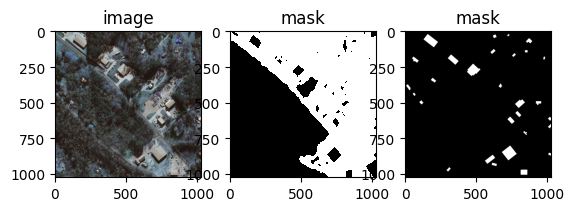

In [43]:
fig = plt.figure()
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(image)
ax1.set_title('image')
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(mask,cmap='gray')
ax2.set_title('mask')
ax3 = fig.add_subplot(1,3,3)
ax3.imshow(mask_gt,cmap='gray')
ax3.set_title('mask_gt')
plt.show()